In [2]:
# Мы нашли библиотеку для python, которая помогает в работе с VK.
import vk

In [3]:
# Группа, которую мы собираемся исследовать.
hoff = 'hoffrus'

In [4]:
# Наш токен для парсинга VK.
TOKEN = ''

# То, что мы хотим узнать о пользователе
fields = ['sex', 'bdate', 'city', 'country', 'home_town', 'photo_id']

# Версия, с которой мы работаем
version = 5.92

In [5]:
# Подключаемся к VK.
session = vk.Session(access_token=TOKEN)
api = vk.API(session)

# Данные о пользователях

### Собираем id подписчиков группы

#### \# Советуем пропустить этот шаг и перейти сразу к исследованию данных (Все данные уже собраны)

In [5]:
# Собираем id подписчиков группы.
count = api.groups.getMembers(group_id=hoff, v=version)["count"]
count = count // 1000

ids = []
for i in range(count + 1):
    offset = i * 1000
    ids = ids + api.groups.getMembers(group_id=hoff, v=version, offset=offset)["items"]

In [6]:
# Запишем все собранные данные в файл hoff.txt.
# добавляя в начало "vk.com/id", а в конец перенос строки.
with open('save/hoff.txt', "w") as file:
    for id in ids:
        file.write("vk.com/id" + str(id) + "\n")

### Собираем информацию о людях и их публикациях


In [15]:
import json

In [16]:
# Теперь соберем информацию о каждом подписчике группы
limit = 2000
users = {}
count = 0

for id in ids:
    try:
        user = api.users.get(user_ids=id, v=version, fields=fields)
        user = user[0]
        
        # Мы пропускаем профили без даты рождения и города 
        if len(user['bdate'].split('.')) != 3:
            continue
        if type(user['city']['id']) != type(1):
            continue
        
        other = api.users.getSubscriptions(user_id=id, v=version)
        posts = api.wall.get(owner_id=user['id'], v=version)
        
        content = {'user': user, 'posts': posts, 'other': other}
        users[id] = content
        
        if count > limit:
            break
        
        print('Found: {}'.format(count))
        count += 1
        
        # Запишем эти данные в файл hoff.json
        if count % 100 == 0:
            with open('save/hoff.json', 'w') as f:
                json.dump(users, f, separators=(',', ':'), indent=4)
                
    except Exception as e:
        pass

Found: 0
Found: 1
Found: 2
Found: 3
Found: 4
Found: 5
Found: 6
Found: 7
Found: 8
Found: 9
Found: 10
Found: 11
Found: 12
Found: 13
Found: 14
Found: 15
Found: 16
Found: 17
Found: 18
Found: 19
Found: 20
Found: 21
Found: 22
Found: 23
Found: 24
Found: 25
Found: 26
Found: 27
Found: 28
Found: 29
Found: 30
Found: 31
Found: 32
Found: 33
Found: 34
Found: 35
Found: 36
Found: 37
Found: 38
Found: 39
Found: 40
Found: 41
Found: 42
Found: 43
Found: 44
Found: 45
Found: 46
Found: 47
Found: 48
Found: 49
Found: 50
Found: 51
Found: 52
Found: 53
Found: 54
Found: 55
Found: 56
Found: 57
Found: 58
Found: 59
Found: 60
Found: 61
Found: 62
Found: 63
Found: 64
Found: 65
Found: 66
Found: 67
Found: 68
Found: 69
Found: 70
Found: 71
Found: 72
Found: 73
Found: 74
Found: 75
Found: 76
Found: 77
Found: 78
Found: 79
Found: 80
Found: 81
Found: 82
Found: 83
Found: 84
Found: 85
Found: 86
Found: 87
Found: 88
Found: 89
Found: 90
Found: 91
Found: 92
Found: 93
Found: 94
Found: 95
Found: 96
Found: 97
Found: 98
Found: 99
Found: 100

Found: 755
Found: 756
Found: 757
Found: 758
Found: 759
Found: 760
Found: 761
Found: 762
Found: 763
Found: 764
Found: 765
Found: 766
Found: 767
Found: 768
Found: 769
Found: 770
Found: 771
Found: 772
Found: 773
Found: 774
Found: 775
Found: 776
Found: 777
Found: 778
Found: 779
Found: 780
Found: 781
Found: 782
Found: 783
Found: 784
Found: 785
Found: 786
Found: 787
Found: 788
Found: 789
Found: 790
Found: 791
Found: 792
Found: 793
Found: 794
Found: 795
Found: 796
Found: 797
Found: 798
Found: 799
Found: 800
Found: 801
Found: 802
Found: 803
Found: 804
Found: 805
Found: 806
Found: 807
Found: 808
Found: 809
Found: 810
Found: 811
Found: 812
Found: 813
Found: 814
Found: 815
Found: 816
Found: 817
Found: 818
Found: 819
Found: 820
Found: 821
Found: 822
Found: 823
Found: 824
Found: 825
Found: 826
Found: 827
Found: 828
Found: 829
Found: 830
Found: 831
Found: 832
Found: 833
Found: 834
Found: 835
Found: 836
Found: 837
Found: 838
Found: 839
Found: 840
Found: 841
Found: 842
Found: 843
Found: 844
Found: 845

Found: 1459
Found: 1460
Found: 1461
Found: 1462
Found: 1463
Found: 1464
Found: 1465
Found: 1466
Found: 1467
Found: 1468
Found: 1469
Found: 1470
Found: 1471
Found: 1472
Found: 1473
Found: 1474
Found: 1475
Found: 1476
Found: 1477
Found: 1478
Found: 1479
Found: 1480
Found: 1481
Found: 1482
Found: 1483
Found: 1484
Found: 1485
Found: 1486
Found: 1487
Found: 1488
Found: 1489
Found: 1490
Found: 1491
Found: 1492
Found: 1493
Found: 1494
Found: 1495
Found: 1496
Found: 1497
Found: 1498
Found: 1499
Found: 1500
Found: 1501
Found: 1502
Found: 1503
Found: 1504
Found: 1505
Found: 1506
Found: 1507
Found: 1508
Found: 1509
Found: 1510
Found: 1511
Found: 1512
Found: 1513
Found: 1514
Found: 1515
Found: 1516
Found: 1517
Found: 1518
Found: 1519
Found: 1520
Found: 1521
Found: 1522
Found: 1523
Found: 1524
Found: 1525
Found: 1526
Found: 1527
Found: 1528
Found: 1529
Found: 1530
Found: 1531
Found: 1532
Found: 1533
Found: 1534
Found: 1535
Found: 1536
Found: 1537
Found: 1538
Found: 1539
Found: 1540
Found: 1541
Foun

### Собрираем информацию о группах, на которые подписаны люди

In [17]:
# На этом моменте первый токен может закончиться.
# Поэтому мы добавляем новый.
TOKEN = 'cef8b074cef8b074cef8b074d0ce9613baccef8cef8b07493005600efb9886c92d86e92'

In [18]:
# Ещё раз подключаемся к VK.
session = vk.Session(access_token=TOKEN)
api = vk.API(session)

In [20]:
keys = users.keys()
groups = {}
count = 0

for key in keys:
    sub = {}
    items = users[key]['other']['groups']['items']
    for item in items:
        tmp = api.groups.getById(group_id=int(item), fields=['activity'], v=version)
        tmp = tmp[0]    
        try:
            sub[item] = tmp['activity']
        except:
            pass
        
    groups[key] = sub
    print(count)
    count += 1
    
    # Периодически сохраняем данные в файл
    if count % 100 == 0:
        with open('save/group_topics.json', 'w') as f:
            json.dump(groups, f, separators=(',', ':'), indent=4)
    
    if count > 400:
        break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# Приступим к исследованию собранных данных

### Из каких городов подписчики?

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import operator
import json

In [3]:
# Загружаем собранные данные 
topics = {}
users = {}

with open('save/hoff.json') as file:
    users = json.load(file)

with open('save/group_topics.json') as file:
    topics = json.load(file)

In [4]:
# Первым делом посчитаем популярность городов
citys = {}


for id in users:
    user = users[id]
    city = user['user']['city']['title']
    exsist = citys.get(city)
    if exsist is None:
        citys[city] = 1
    else:
        citys[city] += 1

In [5]:
# Сортируем по популярности
sort = sorted(citys.items(), key=operator.itemgetter(1), reverse=True)
sorted_citys = {}

for index, item in enumerate(sort):
    # Оставим 20 самых популярных городов
    if index > 20:
        break
    key, value = item
    sorted_citys[key] = value

[]

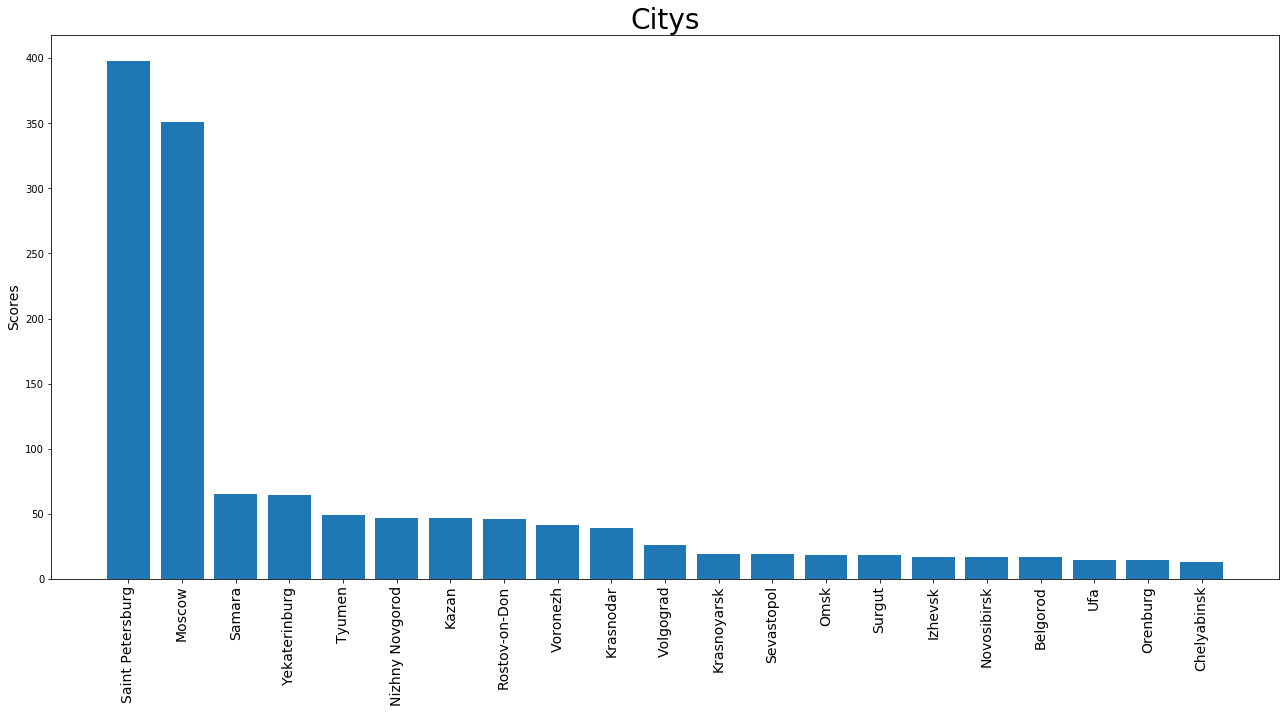

In [6]:
ranks = []
names = []

for key, value in sorted_citys.items():
    ranks.append(value)
    names.append(key)

x = np.arange(len(ranks))
fig, ax = plt.subplots(figsize=(22, 10))
ax.bar(x, ranks)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Citys', fontsize=28)
ax.set_xticks(x)
ax.set_xticklabels(names, rotation='vertical', fontsize=14)
plt.savefig('image/hoff_citys.png')
plt.plot()

#### Вывод:
Из этого графика мы можем сделать вывод, что Hoff настраивает свою основную рекламную кампанию на МСК и СПБ.

### Кого больше девушек или парней?

In [7]:
women = 0
men = 0

for id in users:
    user = users[id]
    sex = int(user['user']['sex'])
    if sex == 2:
        men += 1
    else:
        women += 1

[]

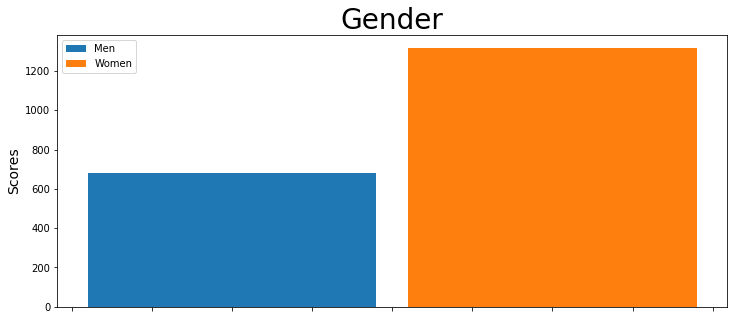

In [8]:
x = np.arange(1)
width = 10

fig, ax = plt.subplots(figsize=(12, 5))
rect1 = ax.bar(x - width/2, men, width-1, label='Men')
rect2 = ax.bar(x + width/2, women, width-1, label='Women')
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Gender', fontsize=28)
ax.tick_params(labelbottom=False)
ax.legend()

plt.savefig('image/hoff_gender.png')
plt.plot()

#### Вывод:
Мы можем предположить, что компания hoff выбирает девушек, как целевую аудиторию.

### Какие тематики групп интересны пользователям?

In [9]:
popular = {}

for id in topics:
    groups = topics[id]
    for item in groups:
        group = groups[item]
        exsist = popular.get(group)
        if exsist is None:
            popular[group] = 1
        else:
            popular[group] += 1        

In [10]:
sort = sorted(popular.items(), key=operator.itemgetter(1), reverse=True)

sorted_pop = {}
for i, item in enumerate(sort):
    if i > 20:
        break
    key, value = item
    sorted_pop[key] = value

[]

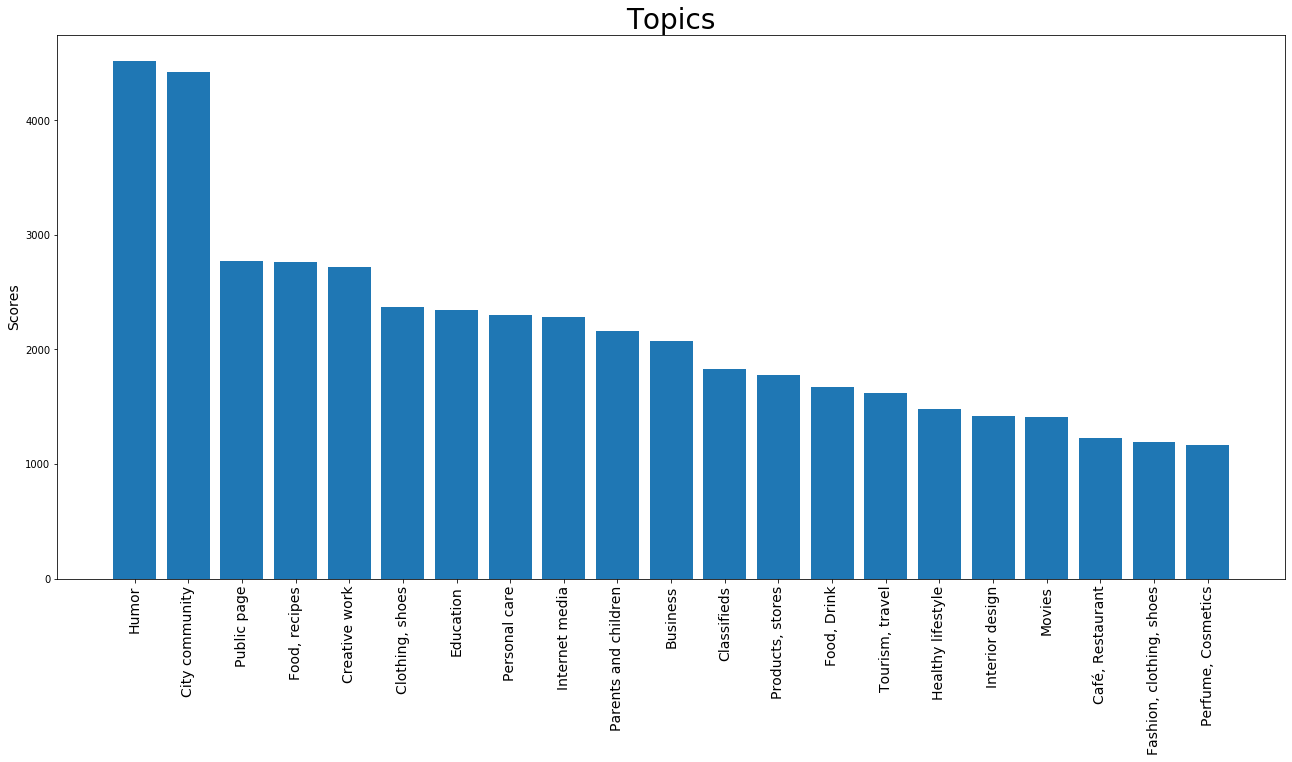

In [11]:
scores = []
labels = []

for key, value in sorted_pop.items():
    scores.append(value)
    labels.append(key)

x = np.arange(len(scores))

fig, ax = plt.subplots(figsize=(22, 10))
ax.bar(x, scores)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Topics', fontsize=28)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical', fontsize=14)
plt.savefig('image/hoff_topics.png')
plt.plot()

#### Вывод:
Мы можем выделить основные темы, которые популярны среди подписчиков:
- Еда
- Бизнес
- Образование
- Путешествия
- Одежда и обувь

### Какие возрастные диапозоны в группе?
Выберем несколько диапозонов возрастов, на которых будем рассматривать наших подписчиков.
- До 18
- От 18 до 25
- От 25 до 30
- От 30 до 35
- От 35 до 40
- От 40 до 45
- От 45 до 70
(почему не до максимального возраста? Потому что есть приколисты-школьники, который ставят возраст 100 лет и т.п.)

[]

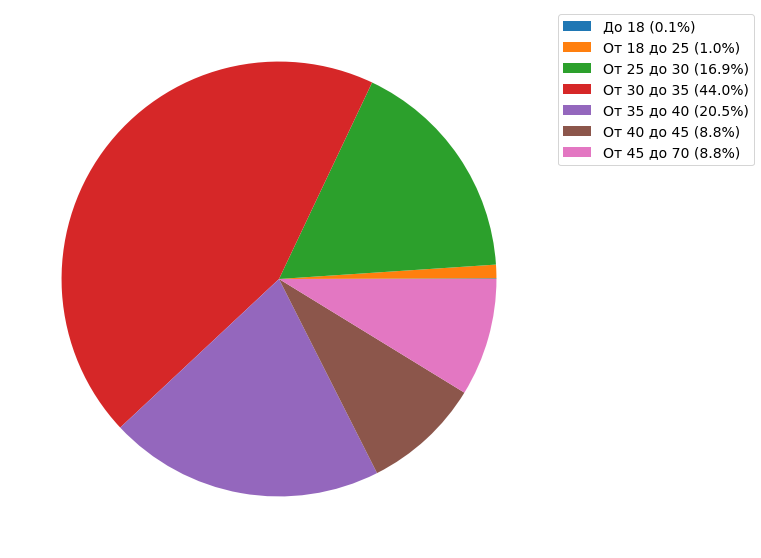

In [12]:
d = []
for i in range(7):
    d.append(0)
for i in users:
    y_o = datetime.datetime.today().year - datetime.datetime.strptime(users[i]['user']['bdate'], "%d.%m.%Y").year
    if y_o < 18:
        d[0] += 1
    elif y_o < 25:
        d[1] += 1
    elif y_o < 30:
        d[2] += 1
    elif y_o < 35:
        d[3] += 1
    elif y_o < 40:
        d[4] += 1
    elif y_o < 45:
        d[5] += 1
    elif y_o < 70:
        d[6] += 1
lab = ['До 18',
       'От 18 до 25',
       'От 25 до 30',
       'От 30 до 35',
       'От 35 до 40',
       'От 40 до 45',
       'От 45 до 70']
fin = sum(d)
labels = [f"{k} ({a / fin:.1%})" for k, a in zip(lab, d)]
plt.subplots(figsize=(22, 10))
plt.pie(d)
plt.legend(labels, bbox_to_anchor=(1, 1), fontsize=14)
plt.savefig('image/hoff_age.png')
plt.plot()

#### Вывод:
Эта диаграмма показывает, что основными клиентами hoff являются люди от 30 до 35. Из этого мы можем предположить, что в этом возрасте люди уделяют больше внимания домашнему уюту.

# О чём говорят подписчики?

### Используем LDA для исследования

In [ ]:
text = []
for i in users:
    for j in users[i]['posts']['items']:
        if j['text'] != '':
            text.append(j['text'])
            try:
                if j['copy_history'][0]['text'] != '':
                    text.append(j['copy_history'][0]['text'])
            except:
                pass
np.save('text', np.asarray(text))
del text

In [1]:
from gensim.models import LdaModel
from nltk.corpus import stopwords
import gensim.corpora as corpora
import pyLDAvis.gensim
import numpy as np
import pymorphy2
import pyLDAvis
import gensim
import nltk

In [ ]:
# Собираем модель!
bad_w = 'com android www https http app vk club wall youtube php'
del_words = ['INTJ', 'PRCL', 'NPRO', 'CONJ', 'COMP', 'ADVB', 'PREP']

topics = 20

text = np.load('text.npy')

# nltk.download('stopwords')

stopwords_ru = stopwords.words('russian')
stopwords_en = stopwords.words('english')

text = [gensim.utils.simple_preprocess(word) for word in text]

morph = pymorphy2.MorphAnalyzer()

text = [[morph.parse(word)[0].normal_form for word in sentense] for sentense in text]
text = [[word for word in sentense if word not in bad_w.split(' ')] for sentense in text]

text = [[word for word in sentense if morph.parse(word)[0].tag.POS not in del_words] for sentense in text]

text = [[word for word in x if word not in stopwords_ru] for x in text]
dictionary = corpora.Dictionary(text)
dictionary.filter_extremes(no_below=10, no_above=0.5)
corpus = [dictionary.doc2bow(i) for i in text]

In [ ]:
model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=topics, alpha='auto')
model.save('LDA.model')

topics = lda_model.show_topics(num_topics=topics, num_words=50, formatted=False)
np.save('topwords', topics)

In [ ]:
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.save_html(vis, 'Visual.html')

### Давайте взглянем на тепловую карту

In [2]:
from gensim.models import LdaModel
import seaborn as sns
import pandas as pd

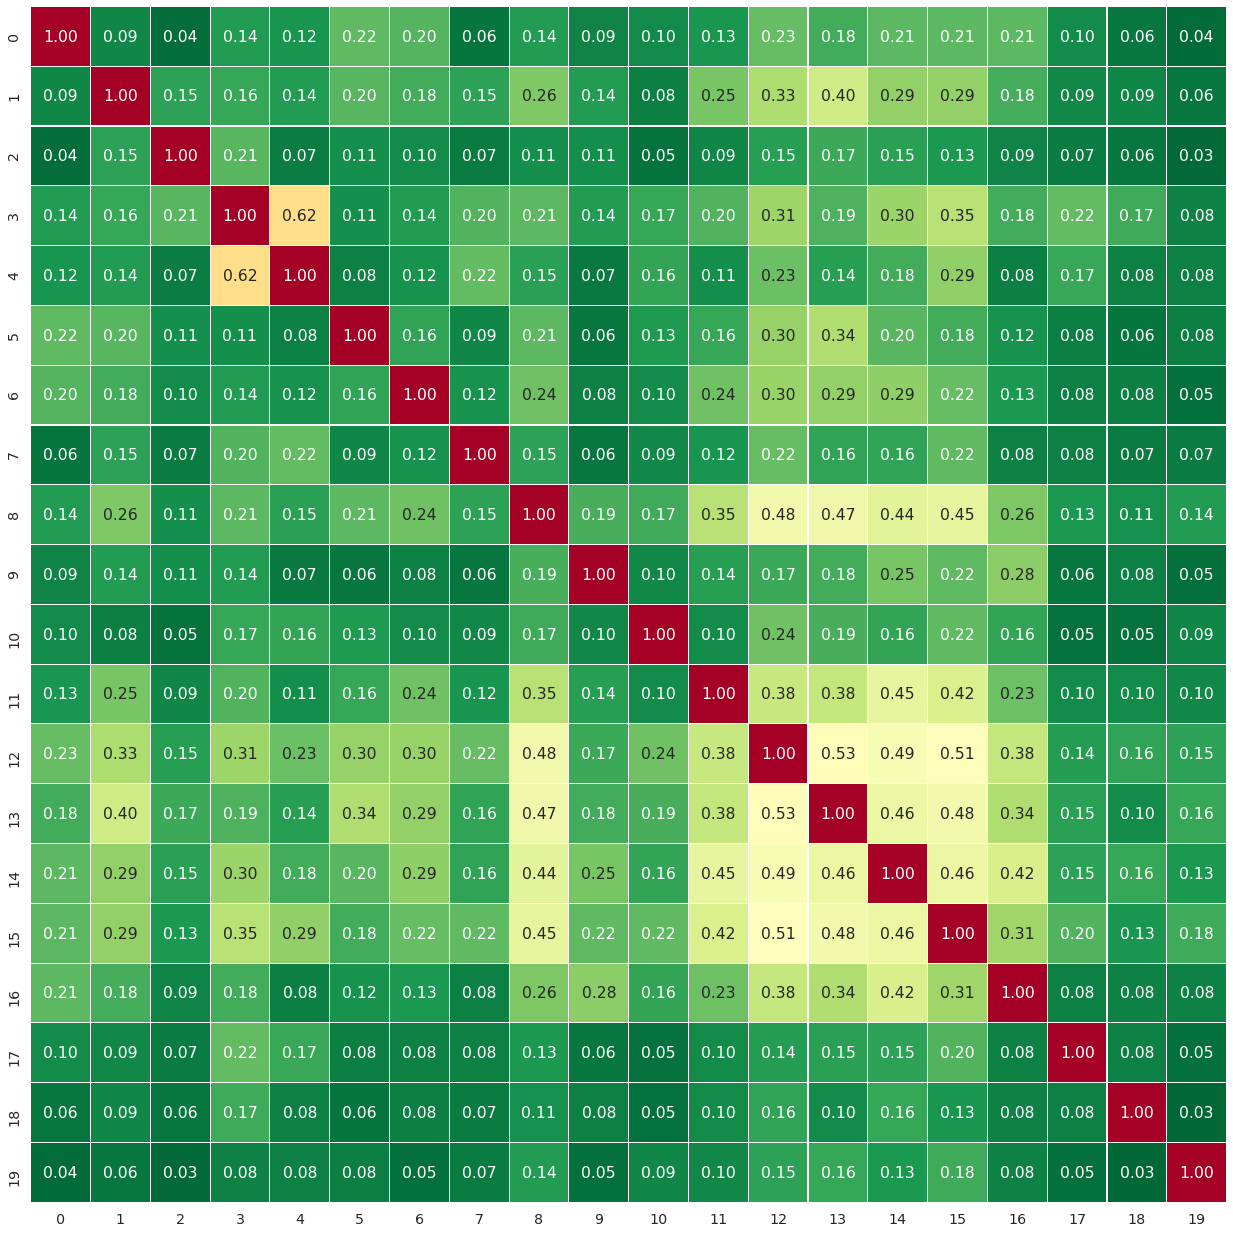

In [6]:
model = LdaModel.load('LDA.model')
Phi = model.state.get_lambda()
S = pd.DataFrame(Phi.T).corr()

sns.set(font_scale=1.3)
plt.subplots(figsize=(22, 22))
sns.heatmap(S, square=True, annot=True, fmt=".2f", linewidths=0.1, cmap="RdYlGn_r", cbar=False)

# Вывод:
Как мы видим, все темы очень сильно совпадают. Отсюда можно сделать предположение, что среди обычных людей также присутствуют и боты, использовавшиеся для раскрутки группы. Особенность ботов в том, что они постят и репостят всё подряд. Предлагаем закрыть магазин и конфисковать у них все столы (себе). А также закрыть их гадкое сообщество, дабы оно не совращало несформуривавиешся умы от покупок ненужных товаров.
Сделаем нашу планету чище!

### А теперь посмотрим на облако слов

### А теперь посмотрим на облако слов

In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [8]:
topics = np.load('topwords.npy', allow_pickle=True)

In [9]:
popular = {}
content = ''

for item in topics:
    words = item[1]
    for index in range(len(words)):
            popular.setdefault(words[index][0], words[index][1])
            if index > 15:
                break
    sort = sorted(popular.items(), key=operator.itemgetter(1), reverse=True)
    for item in sort:
        key, value = item
        content += ' ' + key

[]

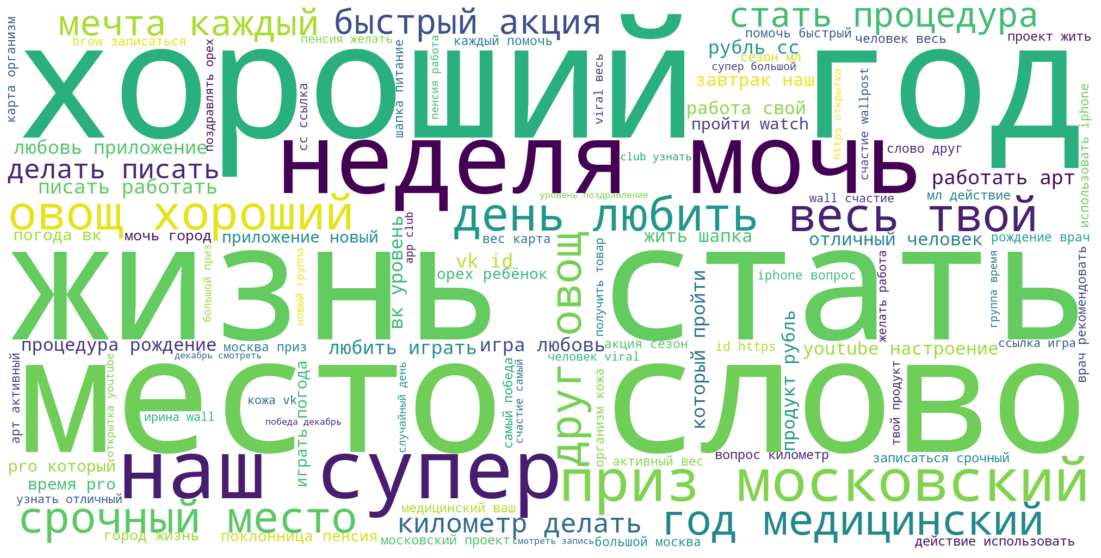

In [15]:
cloud = WordCloud(max_font_size=300, max_words=100, width=2000, height=1000, background_color="white")
cloud.generate(content)
plt.subplots(figsize=(22, 10))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('image/hoff_cloud.png')
plt.plot()